# gff to gene list

Read CSV and translate it into a list of proteins with info


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os
os.listdir('cyanorak')

['Pro_MED4.gbk', 'Pro_MED4.gff']

In [52]:
from Bio import SeqIO

seq_records = [rec for rec in SeqIO.read("cyanorak/Pro_MED4.gbk", "genbank").features if rec.type == "CDS"]
print(f"Total records: {len(seq_records)}")


Total records: 1962


In [56]:
#  'extract',
#  'id',
#  'location',
#  'qualifiers',
#  'translate',
#  'type']
rec=seq_records[8]
rec.qualifiers
rec.location
print(rec)

type: CDS
location: [11107:11734](+)
qualifiers:
    Key: db_xref, Value: ['GI:33860569']
    Key: gene, Value: ['nusB']
    Key: locus_tag, Value: ['PMM0009']
    Key: note, Value: ['cyanorakV1name:PMM0009', 'initial locus-tag:PMM0009', 'COG:COG0781 COG1318', 'bactNOG:bactNOG98581 bactNOG89653 bactNOG99065 bact NOG89531 bactNOG100385', 'cyaNOG:cyaNOG02614', 'CyOG:CyOG01526', 'cyanobase:L L2', 'TIGR role:133', 'cluster MaPP role:P', 'cyanorak cluster number:CK_00000357', 'cyanorak V1 cluster number:357', 'cyanorak Id:121417', 'cyanorak ORF Id:CK_Pro_MED4_00009']
    Key: product, Value: ['transcription antitermination protein NusB']
    Key: translation, Value: ['MHNRSLSRELSLLSLGLIKDTADLELNKIQIDEIFESALDSLINHCRDELDNCEADLENVSQHILDSELKEGSNSSFANVRDELKKAFYKMESVMNSLSVTLDFPKLIVSSNQIDIREDVNHRILSIINNLKSIDSEIDEVMDRWRLKRLPRVDRDILRLAYVDIHFLDTPVAVACDEAVNLANKYCDTQGRKMINGVLRRLQRVKVN#']



In [3]:
ncbi_kegg_df = pd.read_csv('MED4_protein_list.csv')


In [4]:
import gffpandas.gffpandas as gffpd

In [5]:
ncbi_annotation = gffpd.read_gff3('genomic.gff')
print(ncbi_annotation.header)
print(ncbi_annotation.df.head())

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build ASM1146v1
#!genome-build-accession NCBI_Assembly:GCF_000011465.1
#!annotation-date 10/24/2021 23:01:29
#!annotation-source NCBI RefSeq 
##sequence-region NC_005072.1 1 1657990
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=59919

        seq_id            source    type  start      end score strand phase  \
0  NC_005072.1            RefSeq  region      1  1657990     .      +     .   
1  NC_005072.1            RefSeq    gene    174     1331     .      +     .   
2  NC_005072.1  Protein Homology     CDS    174     1331     .      +     0   
3  NC_005072.1            RefSeq    gene   1333     2040     .      +     .   
4  NC_005072.1  Protein Homology     CDS   1333     2040     .      +     0   

                                          attributes  
0  ID=NC_005072.1:1..1657990;Dbxref=taxon:59919;I...  
1  ID=gene-TX50_RS00020;Name=dnaN;gbkey=Gene;gene...  
2  ID=cds-WP_011131639.

In [6]:
cyan_annotation = gffpd.read_gff3('cyanorak/Pro_MED4.gff')
print(cyan_annotation.header)
print(cyan_annotation.df.head())

##gff-version 3
#seqID	source	type	start	end	score	strand	phase	attributes

                seq_id    source               type  start      end score  \
0  Pro_MED4_chromosome  cyanorak  sequence_assembly      1  1657990     .   
1  Pro_MED4_chromosome  cyanorak                CDS    174     1331     .   
2  Pro_MED4_chromosome  cyanorak                CDS   1333     2040     .   
3  Pro_MED4_chromosome  cyanorak                CDS   2044     4383     .   
4  Pro_MED4_chromosome  cyanorak                CDS   4430     5890     .   

  strand  phase                                         attributes  
0      +      0                             ID=Pro_MED4_chromosome  
1      +      0  ID=CK_Pro_MED4_00001;Name=dnaN;product=DNA pol...  
2      +      0  ID=CK_Pro_MED4_00002;Name=PMM0002;product=cons...  
3      +      0  ID=CK_Pro_MED4_00003;Name=purL;product=phospho...  
4      +      0  ID=CK_Pro_MED4_00004;Name=purF;product=amidoph...  


In [57]:
ncbi_attr_df = cyan_annotation.attributes_to_columns()
ncbi_cds_attr_df = ncbi_attr_df.loc[ncbi_attr_df.type.isin(['CDS'])]
ncbi_cds_attr_df.head().T

,1,2,3,4,5
seq_id,Pro_MED4_chromosome,Pro_MED4_chromosome,Pro_MED4_chromosome,Pro_MED4_chromosome,Pro_MED4_chromosome
source,cyanorak,cyanorak,cyanorak,cyanorak,cyanorak
type,CDS,CDS,CDS,CDS,CDS
start,174,1333,2044,4430,5887
end,1331,2040,4383,5890,8328
score,.,.,.,.,.
strand,+,+,+,+,-
phase,0,0,0,0,0
attributes,ID=CK_Pro_MED4_00001;Name=dnaN;product=DNA pol...,ID=CK_Pro_MED4_00002;Name=PMM0002;product=cons...,ID=CK_Pro_MED4_00003;Name=purL;product=phospho...,ID=CK_Pro_MED4_00004;Name=purF;product=amidoph...,ID=CK_Pro_MED4_00005;Name=PMM0005;product=DNA ...
ID,CK_Pro_MED4_00001,CK_Pro_MED4_00002,CK_Pro_MED4_00003,CK_Pro_MED4_00004,CK_Pro_MED4_00005


In [7]:
ncbi_df = ncbi_annotation.df
cyan_df = cyan_annotation.df

In [8]:
ncbi_df.type.unique(), cyan_df.type.unique(), 

(array(['region', 'gene', 'CDS', 'tmRNA', 'exon', 'tRNA', 'rRNA',
        'pseudogene', 'ncRNA', 'SRP_RNA', 'RNase_P_RNA', 'riboswitch'],
       dtype=object),
 array(['sequence_assembly', 'CDS', 'tmRNA', 'tRNA', 'rRNA'], dtype=object))

In [9]:
ncbi_attr_df = ncbi_annotation.attributes_to_columns()
ncbi_cds_attr_df = ncbi_attr_df.loc[ncbi_attr_df.type.isin(['CDS'])]
ncbi_cds_attr_df.head().T

,2,4,6,8,10
seq_id,NC_005072.1,NC_005072.1,NC_005072.1,NC_005072.1,NC_005072.1
source,Protein Homology,Protein Homology,Protein Homology,Protein Homology,Protein Homology
type,CDS,CDS,CDS,CDS,CDS
start,174,1333,2044,4430,5887
end,1331,2040,4383,5890,8328
score,.,.,.,.,.
strand,+,+,+,+,-
phase,0,0,0,0,0
attributes,ID=cds-WP_011131639.1;Parent=gene-TX50_RS00020...,ID=cds-WP_011131640.1;Parent=gene-TX50_RS00025...,ID=cds-WP_011131641.1;Parent=gene-TX50_RS00030...,ID=cds-WP_011131642.1;Parent=gene-TX50_RS00035...,ID=cds-WP_011131643.1;Parent=gene-TX50_RS00040...
Dbxref,Genbank:WP_011131639.1,Genbank:WP_011131640.1,Genbank:WP_011131641.1,Genbank:WP_011131642.1,Genbank:WP_011131643.1


In [10]:
ncbi_cds_attr_df.columns, ncbi_kegg_df.columns

(Index(['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase',
        'attributes', 'Dbxref', 'ID', 'Is_circular', 'Name', 'Note', 'Parent',
        'anticodon', 'bound_moiety', 'end_range', 'exception', 'gb-synonym',
        'gbkey', 'gene', 'gene_biotype', 'genome', 'inference', 'locus_tag',
        'mol_type', 'note', 'old_locus_tag', 'partial', 'product', 'protein_id',
        'pseudo', 'regulatory_class', 'strain', 'sub-species', 'transl_table',
        'type-material'],
       dtype='object'),
 Index(['Name', 'gene', 'locus_tag', 'old_locus_tag', 'source', 'start', 'end',
        'strand', 'Note', 'exception', 'inference', 'product', 'protein_id',
        'gene_length', 'path_id', 'main', 'sub', 'path', 'ecpath', 'Category',
        'Membrane transport', 'kegg_gene1', 'kegg_gene2'],
       dtype='object'))

In [11]:
ncbi_kegg_df.loc[~ncbi_kegg_df.locus_tag.isin(ncbi_cds_attr_df.locus_tag)]

,Name,gene,locus_tag,old_locus_tag,source,start,end,strand,Note,exception,...,gene_length,path_id,main,sub,path,ecpath,Category,Membrane transport,kegg_gene1,kegg_gene2


In [12]:
# psoudo genes missing from the combined file
ncbi_cds_attr_df.loc[~ncbi_cds_attr_df.locus_tag.isin(ncbi_kegg_df.locus_tag)]

,seq_id,source,type,start,end,score,strand,phase,attributes,Dbxref,...,old_locus_tag,partial,product,protein_id,pseudo,regulatory_class,strain,sub-species,transl_table,type-material
1267,NC_005072.1,Protein Homology,CDS,539879,540228,.,-,0,ID=cds-TX50_RS03060;Parent=gene-TX50_RS03060;N...,None,...,None,None,AbrB family transcriptional regulator,None,true,None,None,None,11,None
1517,NC_005072.1,Protein Homology,CDS,654112,654374,.,+,0,ID=cds-TX50_RS03640;Parent=gene-TX50_RS03640;N...,None,...,None,None,ATP-dependent Clp protease adaptor ClpS,None,true,None,None,None,11,None
1827,NC_005072.1,Protein Homology,CDS,773065,773190,.,-,0,ID=cds-TX50_RS04365;Parent=gene-TX50_RS04365;N...,None,...,None,true,high light inducible protein,None,true,None,None,None,11,None
3077,NC_005072.1,Protein Homology,CDS,1311035,1311303,.,-,0,ID=cds-TX50_RS07310;Parent=gene-TX50_RS07310;N...,None,...,None,None,hypothetical protein,None,true,None,None,None,11,None
3175,NC_005072.1,Protein Homology,CDS,1344939,1345064,.,-,0,ID=cds-TX50_RS07510;Parent=gene-TX50_RS07510;N...,None,...,None,true,high light inducible protein,None,true,None,None,None,11,None


In [13]:
cyan_seq_id = cyan_df.seq_id.unique()[0] # Pro_MED4_chromosome

In [14]:
def overlap_size(start1, end1, start2, end2):
    return max(0, min(end1, end2) - max(start1, start2))


In [15]:
def _get_cyan_cds(row):
    #print(row)
    ncbi_ID = row.locus_tag
    ncbi_start = row.start
    ncbi_end = row.end
    overlap_object = cyan_annotation.overlaps_with(seq_id=cyan_seq_id, start=row.start, end=row.end, type='CDS', strand=row.strand, complement=False)
    overlap_df = overlap_object.df
    
    overlap_df['overlap_size'] = overlap_df.apply(lambda x : overlap_size(x.start, x.end, ncbi_start, ncbi_end), axis=1)
    overlap_df['ncbi_overlap_percent'] = overlap_df['overlap_size'].div(ncbi_end - ncbi_start)
    overlap_df['cyanorak_overlap_percent'] = overlap_df['overlap_size'].div(overlap_df['end'] - overlap_df['start'])
    overlap_df['ncbi_ID'] = ncbi_ID
    overlap_df['ncbi_start'] = ncbi_start
    overlap_df['ncbi_end'] = ncbi_end

    overlap_df = overlap_df.loc[overlap_df['ncbi_overlap_percent'].ge(0.7) & overlap_df['cyanorak_overlap_percent'].ge(0.7)].copy()
    
    if overlap_df.shape[0] == 0:
        # not found
        print(f'ID: {ncbi_ID} not found')
        
    if overlap_df.shape[0] > 1:
        # duplicates
        df_select_by_start_end = overlap_df.loc[(overlap_df.start == ncbi_start) & (overlap_df.end == ncbi_end)].copy()
        if df_select_by_start_end.shape[0] == 1:
            # found exact match
            overlap_df = df_select_by_start_end
        
    
    return overlap_df

In [16]:
# Apply function to each row and collect results
result_dfs = [_get_cyan_cds(row) for _, row in ncbi_kegg_df.iterrows()]

# Concatenate all DataFrames into one
mapped_cyan_df = pd.concat(result_dfs, ignore_index=True)


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS00935 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09405 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09255 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09260 not found
ID: TX50_RS03815 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09435 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09290 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09710 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09470 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09520 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS06605 not found
ID: TX50_RS06810 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09500 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS08155 not found


/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overlap_df = overlap_df[condition]
/home/osnat/github/multiomics_biocypher_kg/.venv/lib/python3.13/site-packages/gffpandas/gffpandas.py:246: UserWarning: Boole

ID: TX50_RS09065 not found


In [17]:
mapped_cyan_df['cyanorak_ID'] = mapped_cyan_df.attributes.str.extract('^ID=([^;]+);')

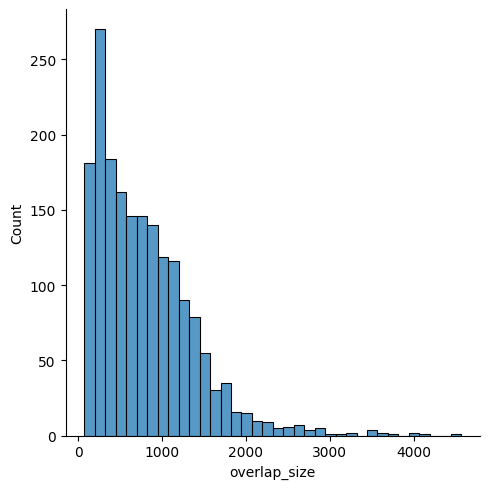

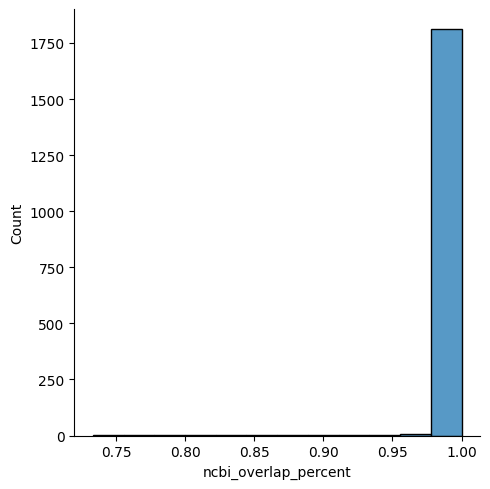

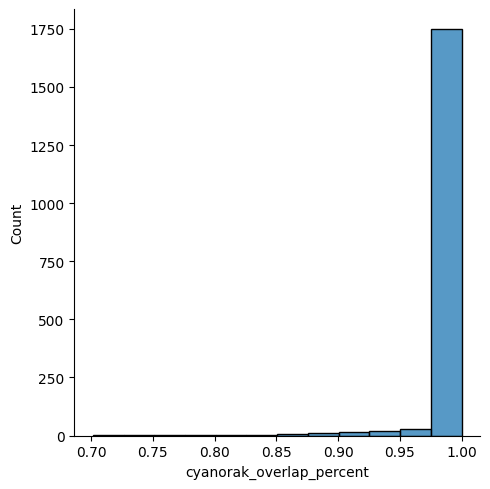

In [18]:
sns.displot(mapped_cyan_df.overlap_size)
sns.displot(mapped_cyan_df.ncbi_overlap_percent)
sns.displot(mapped_cyan_df.cyanorak_overlap_percent)

In [19]:
mapped_cyan_df.cyanorak_overlap_percent.value_counts()

cyanorak_overlap_percent
1.000000    1711
0.921739       2
0.919231       2
0.996487       2
0.940150       1
            ... 
0.950189       1
0.988971       1
0.964232       1
0.992659       1
0.997220       1
Name: count, Length: 132, dtype: int64

In [20]:
ncbi_cds_attr_df.ID.nunique(), ncbi_kegg_df.locus_tag.nunique(), mapped_cyan_df.ncbi_ID.nunique()

(1865, 1860, 1845)

In [21]:
ncbi_cds_attr_df.ID.nunique(), mapped_cyan_df.ncbi_ID.nunique()

(1865, 1845)

In [22]:
mapped_cyan_df.ncbi_ID.value_counts().value_counts()

count
1    1845
Name: count, dtype: int64

In [23]:
mapped_cyan_df.type.value_counts(), ncbi_cds_attr_df.type.value_counts()

(type
 CDS    1845
 Name: count, dtype: int64,
 type
 CDS    1866
 Name: count, dtype: int64)

In [24]:
mapped_cyan_df['cyanorak_ID'].value_counts().value_counts()

count
1    1845
Name: count, dtype: int64

In [25]:
mapped_cyan_df['ncbi_duplicated'] = False
mapped_cyan_df['cyanorak_duplicated'] = False
mapped_cyan_df.loc[mapped_cyan_df.duplicated(subset='ncbi_ID', keep=False), 'ncbi_duplicated'] = True
mapped_cyan_df.loc[mapped_cyan_df.duplicated(subset='cyanorak_ID', keep=False), 'cyanorak_duplicated'] = True

In [26]:
mapped_cyan_df[['ncbi_duplicated','cyanorak_duplicated']].value_counts().reset_index()


,ncbi_duplicated,cyanorak_duplicated,count
0,False,False,1845


In [27]:
cols = [
    'cyanorak_ID', 'ncbi_ID',
    'start', 'ncbi_start',
    'end', 'ncbi_end',
    'cyanorak_overlap_percent', 'ncbi_overlap_percent',
]
mapped_cyan_df.loc[mapped_cyan_df['ncbi_duplicated'].isin([True]), cols]


,cyanorak_ID,ncbi_ID,start,ncbi_start,end,ncbi_end,cyanorak_overlap_percent,ncbi_overlap_percent


In [28]:
mapped_cyan_df[['ncbi_duplicated','cyanorak_duplicated']].value_counts().reset_index()


,ncbi_duplicated,cyanorak_duplicated,count
0,False,False,1845


In [29]:
cyan_attr_to_columns = cyan_annotation.attributes_to_columns()
cyan_attr_to_columns

,seq_id,source,type,start,end,score,strand,phase,attributes,ID,...,eggNOG_description,kegg,kegg_description,ontology_term_description,product,protein_domains,protein_domains_description,tIGR_Role,tIGR_Role_description,translation
0,Pro_MED4_chromosome,cyanorak,sequence_assembly,1,1657990,.,+,0,ID=Pro_MED4_chromosome,Pro_MED4_chromosome,...,None,None,None,None,None,None,None,None,None,None
1,Pro_MED4_chromosome,cyanorak,CDS,174,1331,.,+,0,ID=CK_Pro_MED4_00001;Name=dnaN;product=DNA pol...,CK_Pro_MED4_00001,...,COG: INFORMATION STORAGE AND PROCESSING [L] Re...,2.7.7.7,DNA-directed DNA polymerase%3B DNA polymerase ...,"DNA replication,DNA replication,DNA polymerase...",DNA polymerase III%2C beta subunit,"TIGR00663,PF00712,PF02768,PF02767,IPR022634,IP...","DNA polymerase III%2C beta subunit,DNA polymer...",132,DNA metabolism / DNA replication%2C recombinat...,MEIVCNQNEFNYAIQLVSKAVASRPTHPILANLLLTADQGTNKISL...
2,Pro_MED4_chromosome,cyanorak,CDS,1333,2040,.,+,0,ID=CK_Pro_MED4_00002;Name=PMM0002;product=cons...,CK_Pro_MED4_00002,...,COG: METABOLISM [C] Energy production and conv...,None,None,None,conserved hypothetical protein,None,None,156,Hypothetical proteins / Conserved,LKLPKEFLLSELLRHNVKGNATLNYGKGENVWMHPPVHRILGWYSR...
3,Pro_MED4_chromosome,cyanorak,CDS,2044,4383,.,+,0,ID=CK_Pro_MED4_00003;Name=purL;product=phospho...,CK_Pro_MED4_00003,...,COG: METABOLISM [F] Nucleotide transport and m...,6.3.5.3,phosphoribosylformylglycinamidine synthase%3B ...,"purine ribonucleotide biosynthetic process,glu...",phosphoribosylformylglycinamidine synthase%2C ...,"TIGR01736,PF02769,PF00586,IPR010918,IPR000728,...","phosphoribosylformylglycinamidine synthase II,...",125,Purines%2C pyrimidines%2C nucleosides%2C and n...,MIDSSSNNTYDVNESLKVENLTRDDYEEICKRLGRKPNRTELGMFG...
4,Pro_MED4_chromosome,cyanorak,CDS,4430,5890,.,+,0,ID=CK_Pro_MED4_00004;Name=purF;product=amidoph...,CK_Pro_MED4_00004,...,COG: METABOLISM [F] Nucleotide transport and m...,2.4.2.14,amidophosphoribosyltransferase%3B phosphoribos...,"purine nucleobase biosynthetic process,'de nov...",amidophosphoribosyltransferase,"TIGR01134,PF13522,PF00156,PS51278,IPR005854,IP...","amidophosphoribosyltransferase,Glutamine amido...",125,Purines%2C pyrimidines%2C nucleosides%2C and n...,MCGIVGIVSCDDVNQQIYDSLLLLQHRGQDSTGIATMENTVFHIHK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,Pro_MED4_chromosome,cyanorak,CDS,1649575,1652475,.,-,0,ID=CK_Pro_MED4_01712;Name=uvrA;product=excinuc...,CK_Pro_MED4_01712,...,COG: INFORMATION STORAGE AND PROCESSING [L] Re...,3.1.25.-,None,"DNA repair,DNA repair,excinuclease ABC activit...",excinuclease UvrABC complex%2C ATPase subunit,"TIGR00630,PS00211,PS50893,IPR004602,IPR017871,...","excinuclease ABC subunit A,ABC transporters fa...",132,DNA metabolism / DNA replication%2C recombinat...,MVKKNIGINEDNSIKIRGARQHNLKNIDLTLPRNKFIVFTGVSGSG...
2000,Pro_MED4_chromosome,cyanorak,CDS,1652530,1654209,.,-,0,ID=CK_Pro_MED4_01713;Name=recN;product=ATP-dep...,CK_Pro_MED4_01713,...,COG: INFORMATION STORAGE AND PROCESSING [L] Re...,None,None,"DNA repair,DNA recombination,double-strand bre...",ATP-dependent DNA repair protein RecN,"TIGR00634,PF02463,IPR003395,IPR004604,IPR027417","DNA repair protein RecN,RecF/RecN/SMC N termin...",132,DNA metabolism / DNA replication%2C recombinat...,MLIQLTLKNIALIEIIEINFEKGLNIFTGDSGSGKSLILDSLNVLF...
2001,Pro_MED4_chromosome,cyanorak,CDS,1654279,1656135,.,+,0,ID=CK_Pro_MED4_01714;Name=PMM1714;product=ABC1...,CK_Pro_MED4_01714,...,COG: POORLY CHARACTERIZED [R] General function...,None,None,"protein phosphorylation,protein phosphorylatio...",ABC1 family protein,"PF03109,PS50011,IPR004147,IPR000719","ABC1 family,Protein kinase domain profile.,Ubi...",185,Unclassified / Role category not yet assigned,MNEDYKDFIEASGLLKYDPAIISKIYQKNPSRLLKRLWQTLIPIFL...
2002,Pro_MED4_chromosome,cyanorak,CDS,1656136,1656711,.,+,0,ID=CK_Pro_MED4_01715;Name=PMM1715;product=alph...,CK_Pro_MED4_01715,...,COG: POORLY CHARACTERIZED [S] Function

In [30]:
mapped_cyan_df.columns, cyan_attr_to_columns.columns

(Index(['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase',
        'attributes', 'overlap_size', 'ncbi_overlap_percent',
        'cyanorak_overlap_percent', 'ncbi_ID', 'ncbi_start', 'ncbi_end',
        'cyanorak_ID', 'ncbi_duplicated', 'cyanorak_duplicated'],
       dtype='object'),
 Index(['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase',
        'attributes', 'ID', 'Name', 'Ontology_term', 'cluster_number',
        'cyanorak_Role', 'cyanorak_Role_description', 'eggNOG',
        'eggNOG_description', 'kegg', 'kegg_description',
        'ontology_term_description', 'product', 'protein_domains',
        'protein_domains_description', 'tIGR_Role', 'tIGR_Role_description',
        'translation'],
       dtype='object'))

In [31]:
cyan_cds_attr_to_columns = cyan_attr_to_columns.loc[cyan_attr_to_columns.type.isin(['CDS'])]

In [32]:
merge_cols = ['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase','attributes']
mapped_cyan_df2 = pd.merge(cyan_cds_attr_to_columns, mapped_cyan_df, on=merge_cols, how='outer')
mapped_cyan_df3 = pd.merge(ncbi_cds_attr_df, mapped_cyan_df2, left_on='locus_tag', right_on='ncbi_ID', how='outer', suffixes=['', '_cyano'])

In [33]:
mapped_cyan_df3.isna().sum()

seq_id                 117
source                 117
type                   117
start                  117
end                    117
                      ... 
ncbi_start             138
ncbi_end               138
cyanorak_ID            138
ncbi_duplicated        138
cyanorak_duplicated    138
Length: 73, dtype: int64

In [34]:
mapped_cyan_df2.loc[mapped_cyan_df2.overlap_size.isna()][['cyanorak_Role_description', 'product', ]].value_counts(dropna=False)


cyanorak_Role_description                                 product                                                                  
NaN                                                       Hypothetical protein                                                         32
                                                          Conserved hypothetical protein                                               30
Conserved hypothetical proteins                           uncharacterized conserved membrane protein                                   18
                                                          conserved hypothetical protein                                               12
                                                          possible uncharacterized conserved secreted protein                           4
NaN                                                       conserved hypothetical protein                                                4
                                        

In [35]:
for c in mapped_cyan_df3.columns:
    print(c, mapped_cyan_df3[c].nunique())
    print(mapped_cyan_df3[c].value_counts().head(5))

seq_id 1
seq_id
NC_005072.1    1866
Name: count, dtype: int64
source 2
source
Protein Homology    1815
GeneMarkS-2+          51
Name: count, dtype: int64
type 1
type
CDS    1866
Name: count, dtype: int64
start 1866
start
174.0        1
1152958.0    1
1166389.0    1
1165667.0    1
1164442.0    1
Name: count, dtype: int64
end 1866
end
1331.0       1
1154157.0    1
1167000.0    1
1166386.0    1
1165665.0    1
Name: count, dtype: int64
score 1
score
.    1866
Name: count, dtype: int64
strand 2
strand
-    967
+    899
Name: count, dtype: int64
phase 1
phase
0    1866
Name: count, dtype: int64
attributes 1865
attributes
ID=cds-WP_011131819.1;Parent=gene-TX50_RS00935;Dbxref=Genbank:WP_011131819.1;Name=WP_011131819.1;Note=programmed frameshift;exception=ribosomal slippage;gbkey=CDS;gene=prfB;inference=COORDINATES: similar to AA sequence:RefSeq:WP_011131819.1;locus_tag=TX50_RS00935;product=peptide chain release factor 2;protein_id=WP_011131819.1;transl_table=11    2
ID=cds-WP_011131639.1;Paren

In [36]:
mapped_cyan_df3[['product', 'product_cyano']].value_counts()

product                                   product_cyano                                         
hypothetical protein                      conserved hypothetical protein                            189
                                          Conserved hypothetical protein                             41
                                          uncharacterized conserved membrane protein                 40
high light inducible protein              high light inducible protein                               19
hypothetical protein                      Hypothetical protein                                       19
                                                                                                   ... 
NADP-dependent isocitrate dehydrogenase   isocitrate dehydrogenase                                    1
NADH-quinone oxidoreductase subunit NuoK  NADH dehydrogenase subunit NdhE (chain kappa or 4L)         1
NADH-quinone oxidoreductase subunit NuoH  NADH dehydrogenase I subunit 

In [37]:
mapped_cyan_df3.to_csv('MED4_proteins_cyanorak.csv', index=False)